In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
titles = pd.read_csv('./netflix_titles.csv')

In [3]:
titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
titles.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
titles.duplicated().sum()

0

In [ ]:
#Creo un nuevo DF sin los valores nulos.
titles_clean = titles.dropna()

In [11]:
titles_clean.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
titles_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [25]:
types_count = titles_clean['type'].value_counts()
print(types_count)

type
Movie      5185
TV Show     147
Name: count, dtype: int64


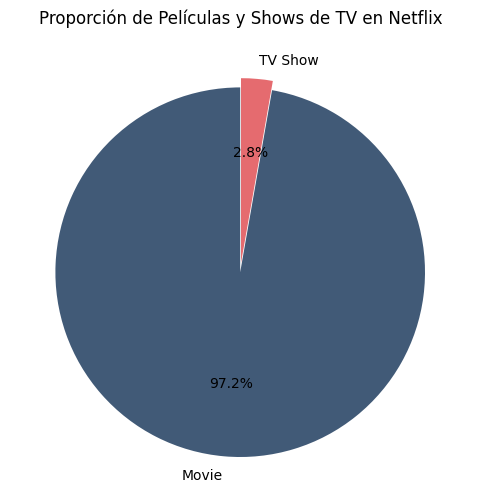

In [27]:
#Realizo un gráfico para visualizar la distribución de títulos por películas y por shows de tv.
plt.figure(figsize=(6,6))
plt.pie(types_count, labels=types_count.index, autopct='%1.1f%%', colors=['#415a77', '#e56b6f'], startangle=90, explode=(0.05, 0))
plt.title("Proporción de Películas y Shows de TV en Netflix")
plt.show()

Podemos ver que el catálogo cuenta con muchísimas más películas que shows de tv.

In [22]:
#Separo el DF en dos partes, para realizar los análisis de películas y shows de tv por separado, para mayor eficiencia.
movies = titles_clean[titles_clean['type'] == 'Movie'].copy()

In [18]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...


In [19]:
tv_show = titles_clean[titles_clean['type'] == 'TV Show'].copy()

In [20]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."


In [ ]:
#Verifico la cantidad de registros en cada uno para ver si coincide con el DF inicial:
print(f"Movies: {movies.shape[0]}, TV Shows: {tv_show.shape[0]}")

Movies: 5185, TV Shows: 147


In [38]:
#Con los nuevos DF ya puedo proceder a hacer análisis más específicos, ahora visualizaré la distribución por género en películas, luego en shows de tv:
all_movie_genres = movies['listed_in'].dropna().str.split(', ').explode()

In [39]:
genre_counts = Counter(all_movie_genres)

In [40]:
print(genre_counts)

Counter({'International Movies': 2369, 'Dramas': 2293, 'Comedies': 1553, 'Action & Adventure': 806, 'Independent Movies': 740, 'Romantic Movies': 579, 'Thrillers': 547, 'Children & Family Movies': 503, 'Documentaries': 391, 'Horror Movies': 336, 'Stand-Up Comedy': 294, 'Music & Musicals': 292, 'Sci-Fi & Fantasy': 236, 'Sports Movies': 156, 'Classic Movies': 108, 'LGBTQ Movies': 80, 'Cult Movies': 69, 'Anime Features': 61, 'Faith & Spirituality': 58, 'Movies': 20})


In [34]:
#Guardo el conteo de generos en un nuevo DF para mejor visualización:
movie_genres = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

In [37]:
movie_genres.head(10) 

,Genre,Count
2,International Movies,2369
0,Dramas,2293
3,Comedies,1553
8,Action & Adventure,806
1,Independent Movies,740
4,Romantic Movies,579
7,Thrillers,547
11,Children & Family Movies,503
12,Documentaries,391
5,Horror Movies,336


C:\Users\sabkr\AppData\Local\Temp\ipykernel_5216\3879694058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_genres['Count'][:10], y=movie_genres['Genre'][:10], palette='viridis')


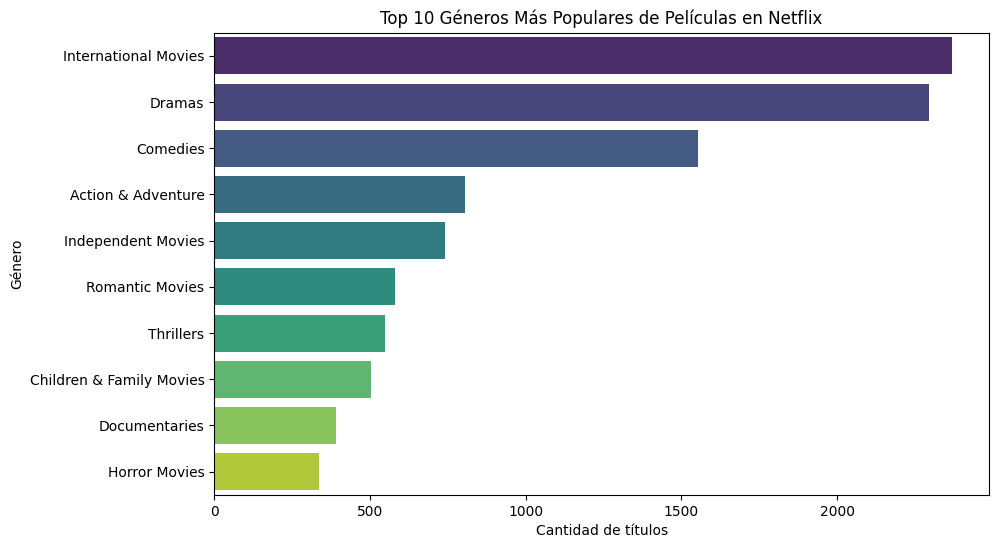

In [ ]:
#Procedo con la visualización
plt.figure(figsize=(10,6))
sns.barplot(x=movie_genres['Count'][:10], y=movie_genres['Genre'][:10], palette='viridis')
plt.xlabel("Cantidad de títulos")
plt.ylabel("Género")
plt.title("Top 10 Géneros Más Populares de Películas en Netflix")
plt.show()

Vemos que los géneros más populares son películas internacionales, dramas y comedia principalmente, con más de 1500 títulos en cada género.

In [41]:
#Repito para shows de TV:
all_show_genres = tv_show['listed_in'].dropna().str.split(', ').explode()

In [44]:
show_genre_counts = Counter(all_show_genres)

In [45]:
print(show_genre_counts)

Counter({'International TV Shows': 87, 'TV Dramas': 52, 'Crime TV Shows': 38, 'TV Comedies': 30, 'British TV Shows': 21, 'Romantic TV Shows': 21, 'Docuseries': 14, 'TV Action & Adventure': 13, "Kids' TV": 13, 'Stand-Up Comedy & Talk Shows': 11, 'Spanish-Language TV Shows': 10, 'Anime Series': 10, 'Korean TV Shows': 10, 'TV Mysteries': 8, 'TV Horror': 7, 'TV Shows': 5, 'TV Sci-Fi & Fantasy': 4, 'Reality TV': 3, 'Teen TV Shows': 3, 'Classic & Cult TV': 3, 'TV Thrillers': 3, 'Science & Nature TV': 1})


In [46]:
show_genres = pd.DataFrame(show_genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

In [47]:
show_genres.head(10)

,Genre,Count
3,International TV Shows,87
4,TV Dramas,52
2,Crime TV Shows,38
8,TV Comedies,30
0,British TV Shows,21
5,Romantic TV Shows,21
12,Docuseries,14
18,Kids' TV,13
9,TV Action & Adventure,13
17,Stand-Up Comedy & Talk Shows,11


C:\Users\sabkr\AppData\Local\Temp\ipykernel_5216\3613160968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=show_genres['Count'][:10], y=show_genres['Genre'][:10], palette='Spectral')


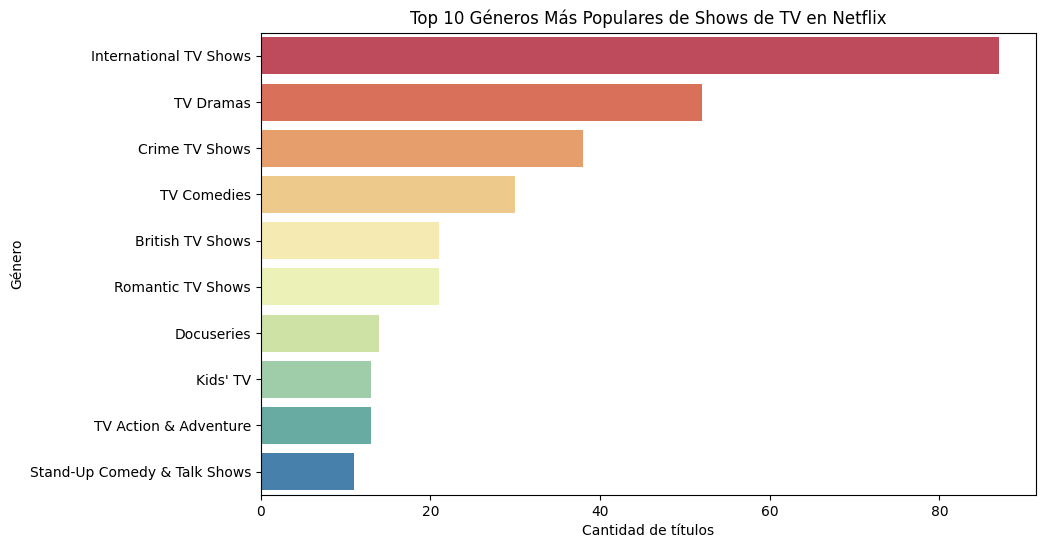

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x=show_genres['Count'][:10], y=show_genres['Genre'][:10], palette='Spectral')
plt.xlabel("Cantidad de títulos")
plt.ylabel("Género")
plt.title("Top 10 Géneros Más Populares de Shows de TV en Netflix")
plt.show()

Vemos que los primeros dos géneros coinciden con los del DF de películas, siendo estos shows internacionales y de drama. Pero el tercero es diferente, es crimen, con mas de 40 títulos. 

In [50]:
#Ahora continuo con la distribuciój de países de producción, comenzando por películas y luego por shows de tv:
print(movies['country'].dropna().head(10)) 

7     United States, Ghana, Burkina Faso, United Kin...
9                                         United States
12                              Germany, Czech Republic
24                                                India
27                                        United States
28                                        United States
29                         United States, India, France
38                         China, Canada, United States
41                                        United States
42                                        United States
Name: country, dtype: object


In [54]:
#Repito lo que realicé anteriormente para géneros, guardando los países en un DF nuevo:
all_movie_countries = movies['country'].dropna().str.split(', ').explode()

In [56]:
movie_country_counts = Counter(all_movie_countries)
print(movie_country_counts)

Counter({'United States': 2444, 'India': 932, 'United Kingdom': 461, 'Canada': 287, 'France': 285, 'Germany': 165, 'Spain': 152, 'Japan': 113, 'China': 107, 'Egypt': 99, 'Hong Kong': 98, 'Mexico': 97, 'Nigeria': 92, 'Indonesia': 84, 'Australia': 83, 'Turkey': 81, 'Philippines': 79, 'Belgium': 73, 'Argentina': 64, 'Italy': 60, 'Brazil': 56, 'South Korea': 56, 'South Africa': 47, 'Thailand': 43, 'Netherlands': 35, 'United Arab Emirates': 34, 'Poland': 30, 'Ireland': 29, 'Denmark': 25, 'Sweden': 25, 'Chile': 24, 'New Zealand': 22, 'Lebanon': 22, 'Norway': 19, 'Pakistan': 19, 'Switzerland': 18, 'Singapore': 18, 'Malaysia': 18, 'Taiwan': 18, 'Colombia': 17, 'Israel': 16, 'Czech Republic': 15, 'Romania': 13, 'Bulgaria': 10, 'Hungary': 10, 'Luxembourg': 10, 'Uruguay': 10, 'Saudi Arabia': 9, 'Qatar': 9, 'Austria': 9, 'Russia': 9, 'Iceland': 8, 'Peru': 8, 'Vietnam': 7, 'Serbia': 7, 'Greece': 6, 'Kenya': 6, 'Portugal': 6, 'Jordan': 6, 'Ghana': 5, 'Kuwait': 5, 'Cambodia': 5, 'Morocco': 5, 'Bangla

In [61]:
movie_countries = pd.DataFrame(movie_country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

In [62]:
movie_countries.head(10)

,Country,Count
0,United States,2444
7,India,932
3,United Kingdom,461
10,Canada,287
8,France,285
4,Germany,165
14,Spain,152
12,Japan,113
9,China,107
39,Egypt,99


C:\Users\sabkr\AppData\Local\Temp\ipykernel_5216\2380928205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_countries['Count'][:10], y=movie_countries['Country'][:10], palette='magma')


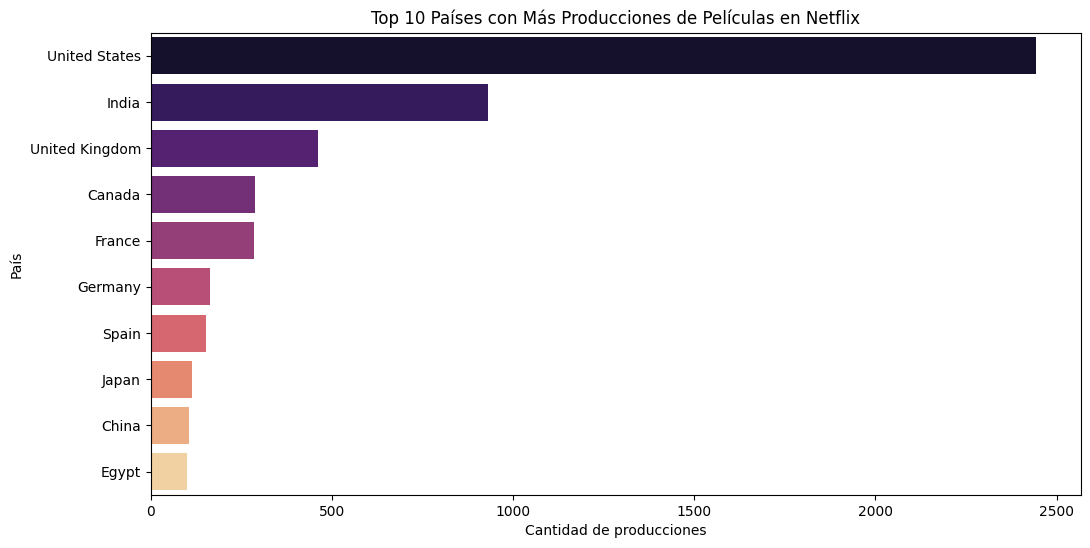

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x=movie_countries['Count'][:10], y=movie_countries['Country'][:10], palette='magma')
plt.xlabel("Cantidad de producciones")
plt.ylabel("País")
plt.title("Top 10 Países con Más Producciones de Películas en Netflix")
plt.show()

Vemos que Estados Unidos lidera la lista, con más de 2000 títulos. Seguido por India, quien cuenta con casi la mitad. Se puede una amplia diferencia en la cantidad de títulos por país. Esto puede afectar negativamentea la cantidad de suscripciones en países con pocas producciones donde los habitantes quizás quieren consumir más contenido local.

In [64]:
#Repito para shows de tv:
all_show_countries = tv_show['country'].dropna().str.split(', ').explode()

In [65]:
show_country_counts = Counter(all_show_countries)
print(show_country_counts)

Counter({'United States': 41, 'United Kingdom': 23, 'South Korea': 12, 'Japan': 11, 'Spain': 9, 'France': 8, 'India': 8, 'Taiwan': 8, 'Canada': 8, 'Thailand': 5, 'Italy': 5, 'Turkey': 5, 'Nigeria': 4, 'Brazil': 4, 'Mexico': 4, 'Philippines': 2, 'Germany': 2, 'China': 2, 'Colombia': 2, 'Denmark': 2, 'Ireland': 2, 'Poland': 1, 'Singapore': 1, 'Indonesia': 1, 'Russia': 1, 'Belgium': 1, 'Argentina': 1, 'Saudi Arabia': 1, 'Malaysia': 1, 'Australia': 1, 'Israel': 1, 'South Africa': 1, 'Greece': 1, 'Pakistan': 1})


In [66]:
show_countries = pd.DataFrame(show_country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

In [68]:
show_countries.head(10)

,Country,Count
6,United States,41
0,United Kingdom,23
13,South Korea,12
11,Japan,11
3,Spain,9
2,France,8
4,India,8
5,Taiwan,8
14,Canada,8
22,Italy,5


C:\Users\sabkr\AppData\Local\Temp\ipykernel_5216\1030071948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=show_countries['Count'][:10], y=show_countries['Country'][:10], palette='coolwarm')


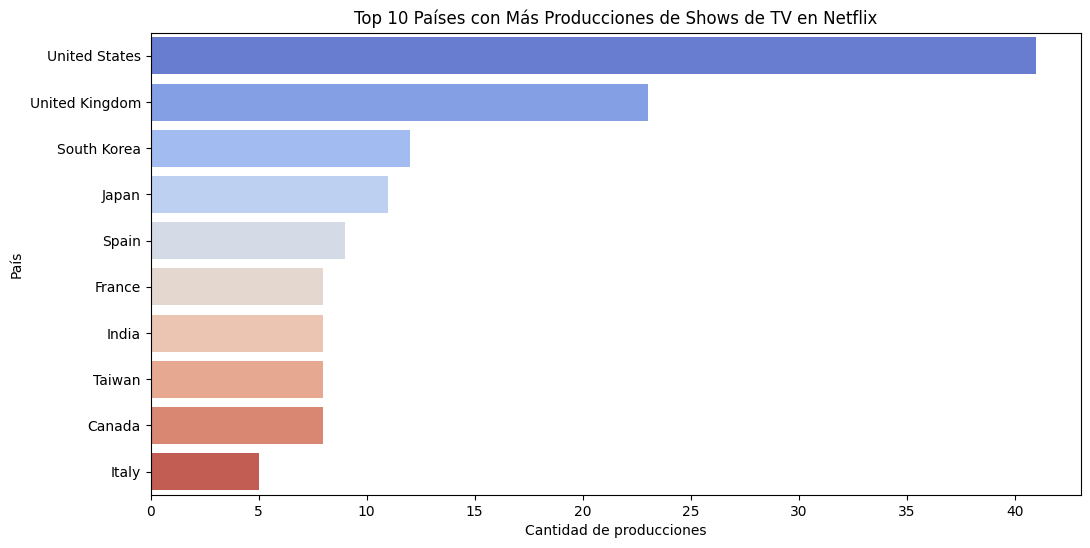

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(x=show_countries['Count'][:10], y=show_countries['Country'][:10], palette='coolwarm')
plt.xlabel("Cantidad de producciones")
plt.ylabel("País")
plt.title("Top 10 Países con Más Producciones de Shows de TV en Netflix")
plt.show()

Acá devuelta podemos ver como Estados Unidos lidera el top una vez más, esta vez seguido de Reino Unido y Corea del Sur, aunque también por una amplia diferencia en la cantidad de títulos.

In [110]:
#Ahora, voy a analizar la relación entre los países y el tipo de contenido que produce cada uno, para esto voy a utilizar el dataset original (limpio):
titles_exploded = titles.dropna(subset=['country']).copy() #Separo los países en filas individuales
titles_exploded['country'] = titles_exploded['country'].str.split(', ')
titles_exploded = titles_exploded.explode('country') #Expando las listas en filas

In [111]:
type_country = titles_exploded.groupby(['country', 'type']).size().unstack(fill_value=0) #Cuento cuantos títulos hay por tipo y por país

In [112]:
type_country['Total'] = type_country['Movie'] + type_country['TV Show']
type_country = type_country.sort_values(by='Total', ascending=False) #Ordeno por el total de producciones

In [113]:
print(type_country.head(10))

type            Movie  TV Show  Total
country                              
United States    2751      938   3689
India             962       84   1046
United Kingdom    532      272    804
Canada            319      126    445
France            303       90    393
Japan             119      199    318
Spain             171       61    232
South Korea        61      170    231
Germany           182       44    226
Mexico            111       58    169


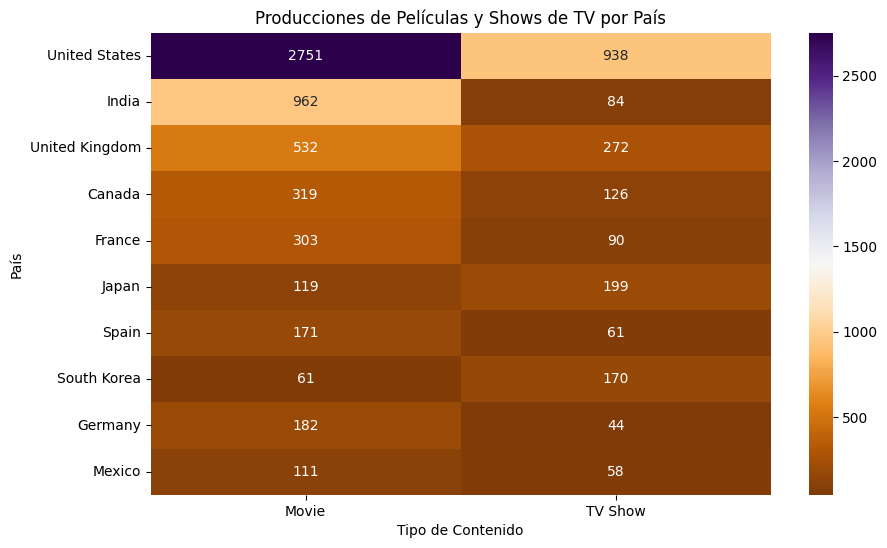

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(type_country.head(10)[['Movie', 'TV Show']], annot=True, cmap='PuOr', fmt='d')
plt.xlabel("Tipo de Contenido")
plt.ylabel("País")
plt.title("Producciones de Películas y Shows de TV por País")
plt.show()

Con este gráfico, podemos entender un poco más acerca de la distribución por tipo de contenido en cada país. Vemos que una vez más, Estados Unidos lidera el top tanto en películas como en shows. Pero también vemos que países como Japón y Corea del Sur cuentan con mayor cantidad de Shows de TV. Esto impacta positivamente, ya que en la actualidad las series de tv asiáticas están en tendencia. Luego, países como India, Reino Unido, Canadá y Francia son quienes cuentan con mayor cantidad de películas. 
La cantidad de títulos de shows es un tanto más balanceada que la cantidad de títulos para películas. Esto podría llegar a afectar positiva o negativamente, dependiendo de la preferencia de contenido de los usuarios por país.

In [124]:
#Luego de ver la relación cantidad por país, decidí que seria importante ver la relación entre los géneros y países. Para esto vuelvo a utilizar los DF nuevos:
def genre_countries_count(df):
    titles_exploded = df.dropna(subset=['country', 'listed_in']).copy()
    titles_exploded['country'] = titles_exploded['country'].str.split(', ')
    titles_exploded = titles_exploded.explode('country')  #Expande países en filas individuales
    titles_exploded['listed_in'] = titles_exploded['listed_in'].str.split(', ')
    titles_exploded = titles_exploded.explode('listed_in')  #Expande géneros en filas individuales

    country_genres = titles_exploded.groupby(['country', 'listed_in']).size().unstack(fill_value=0) #Cuento cuántos contenidos hay por país y género

    return country_genres

In [125]:
movies_genres_df = genre_countries_count(movies)
shows_genres_df = genre_countries_count(tv_show)

In [126]:
movies_genres_df.head()

listed_in,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
country,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Algeria,0,0,0,1,0,0,0,3,0,0,1,3,0,0,0,0,0,0,0,0
Angola,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [127]:
shows_genres_df.head()

listed_in,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
country,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Australia,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Belgium,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Brazil,0,0,0,0,2,4,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
Canada,0,1,1,1,2,2,3,0,0,0,...,0,1,2,1,1,0,0,0,0,1


In [ ]:
#Vemos que hay muchos países con valores de 0, así que realizamos una función para filtrar el top 10 de países con mayor cantidad de títulos para cada género.
def top_10_countries(df_genres):
    top_10_genres = df_genres.sum(axis=0).sort_values(ascending=False).head(10).index  #Filtro los 10 países con más títulos por cada género
    df_genres_top10 = df_genres[top_10_genres]
    
    df_genres_top10 = df_genres_top10.loc[df_genres_top10.sum(axis=1).sort_values(ascending=False).head(10).index]
    
    return df_genres_top10

In [156]:
df_top10_movies = top_10_countries(movies_genres_df)

In [157]:
df_top10_movies.head()

listed_in,Dramas,International Movies,Comedies,Action & Adventure,Independent Movies,Thrillers,Children & Family Movies,Romantic Movies,Documentaries,Horror Movies
country,,,,,,,,,,
United States,827,134,667,401,389,292,369,224,254,199
India,657,840,319,137,165,90,25,117,8,34
United Kingdom,194,138,89,82,73,61,45,38,69,28
France,167,191,51,37,73,44,23,22,26,10
Canada,81,48,94,44,44,49,74,24,19,36


In [158]:
df_top10_tvshows = top_10_countries(shows_genres_df)

In [159]:
df_top10_tvshows.head()

listed_in,International TV Shows,TV Dramas,Crime TV Shows,TV Comedies,British TV Shows,Docuseries,Kids' TV,Romantic TV Shows,TV Action & Adventure,Spanish-Language TV Shows
country,,,,,,,,,,
United States,8,10,10,10,2,7,5,2,9,2
United Kingdom,9,8,4,3,20,5,3,2,2,0
Spain,9,2,4,1,2,1,0,2,0,5
South Korea,11,1,1,0,0,0,1,5,2,0
Taiwan,8,5,3,1,0,0,0,2,1,0


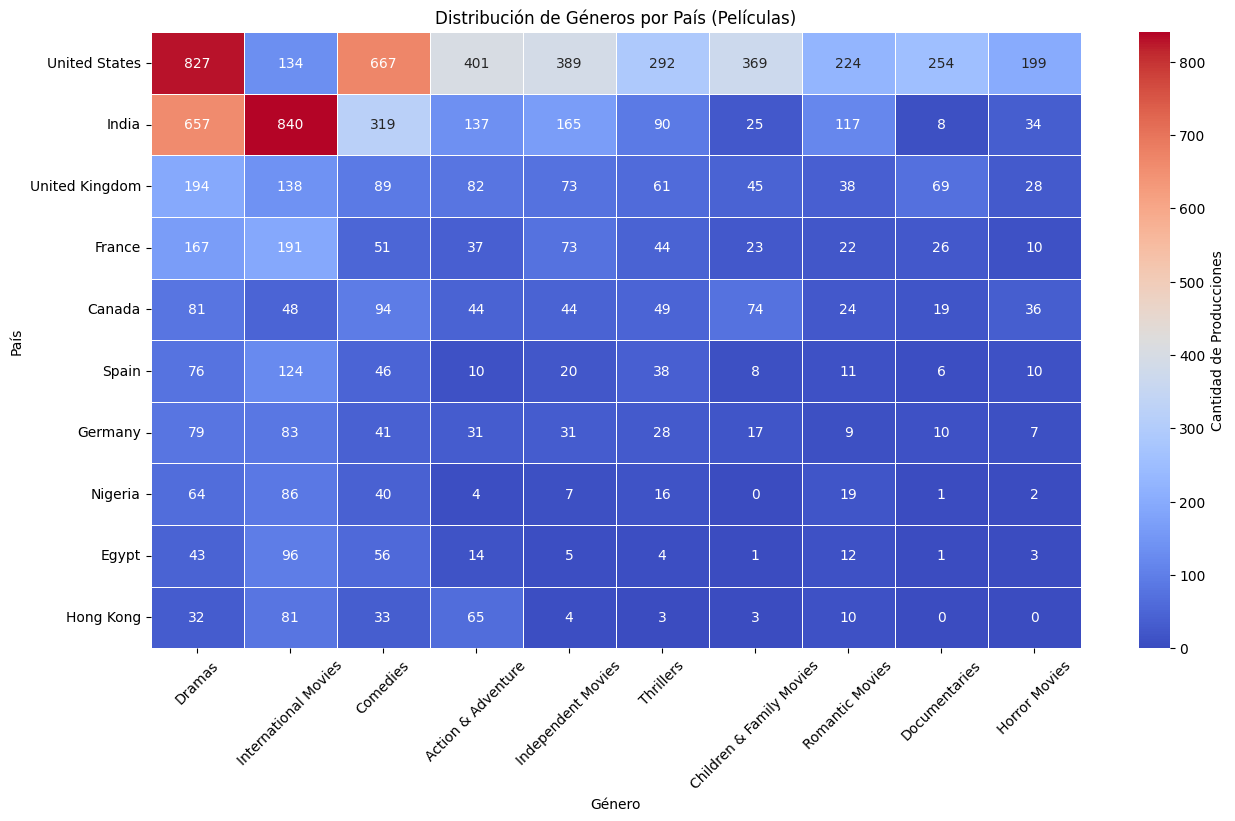

In [160]:
plt.figure(figsize=(15,8)) 
sns.heatmap(df_top10_movies, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Cantidad de Producciones'})
plt.title("Distribución de Géneros por País (Películas)")
plt.xlabel("Género")
plt.ylabel("País")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

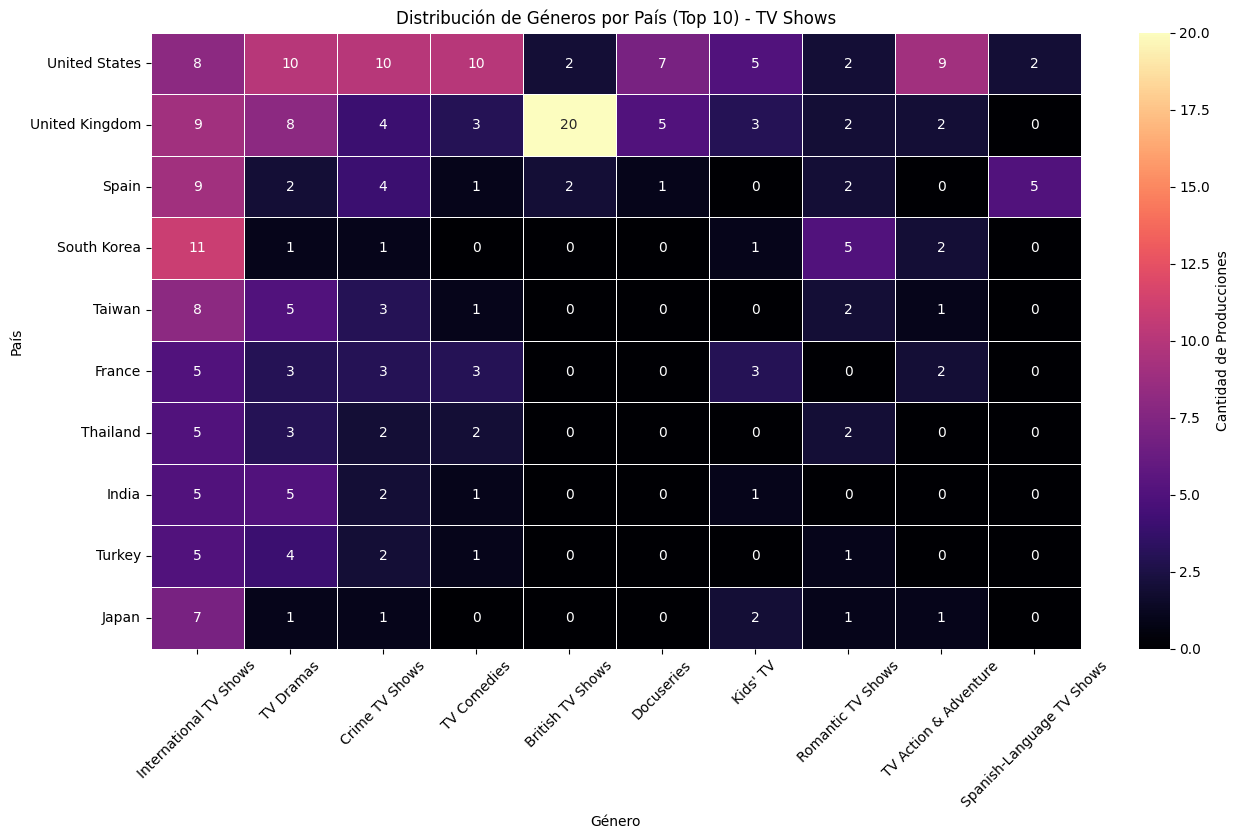

In [161]:
plt.figure(figsize=(15,8)) 
sns.heatmap(df_top10_tvshows, cmap='magma', annot=True, fmt='d', linewidths=0.5, cbar_kws={'label': 'Cantidad de Producciones'})
plt.title("Distribución de Géneros por País (Top 10) - TV Shows")
plt.xlabel("Género")
plt.ylabel("País")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()